In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

data = pd.read_csv("Life Expectancy Data.csv")
data = pd.DataFrame(data)
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Measles Score,Overall Score
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,-15.4,18.53
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,50.8,56.93
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,57.0,61.00
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,-178.7,-14.90
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,-201.3,-21.77


In [2]:
GDP_data = pd.read_csv("GDP.csv", header = 4)
country_labels = pd.read_csv("CountryNames.csv")

#country_labels.head(30)

In [3]:
i = 0
for index, row in GDP_data.iterrows():
    try:
        mask = row['Country Name'] == country_labels['Country']    
        x = country_labels[mask]['Target Name'].values[0]
        GDP_data.at[index, 'Country Name'] = x
    
    except:    
        continue

#GDP_data.tail()

In [4]:

for index, row in data.iterrows():
    try:
        mask = GDP_data['Country Name'] == row['Country']     
        x = GDP_data[mask][str(row['Year'])].values[0]
        data.at[index, 'New GDP'] = x
    
    except:
    
        continue


data['New GDP'].isna().value_counts(normalize=True)

False    0.956093
True     0.043907
Name: New GDP, dtype: float64

In [5]:
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Measles Score',
       'Overall Score', 'New GDP'],
      dtype='object')


In [6]:
BMI = pd.read_csv("BMI.csv")
BMI = pd.DataFrame(BMI)

In [7]:
data['New BMI'] = 0
BMI = BMI[BMI['FactValueNumeric'].isna() != True]
BMI['FactValueNumeric'].isna().value_counts(normalize=True)

False    1.0
Name: FactValueNumeric, dtype: float64

In [8]:
for index, row in data.iterrows():
    try:
        mask = ((BMI['Location'] == row['Country']) & (BMI['Period'] == row['Year']) & (BMI['Dim1'] == 'Both sexes'))
        x = BMI[mask]['FactValueNumeric']
        #print(x, type(x))
        data.loc[index, 'New BMI'] = float(x)
        #data.iloc[index, 'New BMI'] = float(BMI[((BMI['Location'] == row['Country']) & (BMI['Period'] == row['Year']) & (BMI['Dim1'] == 'Both sexes'))]['FactValueNumeric'].values[0])
        if len(x)==0:
            continue
    except:
        continue        


In [9]:
data['New BMI']

0       23.3
1       23.2
2       23.0
3       22.9
4       22.8
        ... 
2933    23.4
2934    23.4
2935    23.3
2936    23.3
2937    23.3
Name: New BMI, Length: 2938, dtype: float64

In [10]:
clean_data = data[data['Life expectancy '].isna() != True]

In [11]:
data['Total expenditure'].isna().value_counts(normalize=True)

False    0.923077
True     0.076923
Name: Total expenditure, dtype: float64

In [12]:
#clean_data = data[data['Total expenditure']!='2015']
clean_data = clean_data[clean_data['Life expectancy '].isna() != True]

In [13]:
clean_data['Total expenditure'].isna().value_counts(normalize = True)

False    0.922814
True     0.077186
Name: Total expenditure, dtype: float64

In [14]:
print('sample size', len(clean_data))
print('Descriptive Statistic: Total Expenditure')

print('min', np.min(clean_data['Total expenditure']))
print('1st quantile',clean_data['Total expenditure'].quantile(q=0.25))
print('mean', np.mean(clean_data['Total expenditure']))
print('3rd quantile',clean_data['Total expenditure'].quantile(q=0.75))
print('Max', np.max(clean_data['Total expenditure']))

print('std', np.std(clean_data['Total expenditure']))
print('var', np.var(clean_data['Total expenditure']))



sample size 2928
Descriptive Statistic: Total Expenditure
min 0.37
1st quantile 4.26
mean 5.9301628423390005
3rd quantile 7.49
Max 17.6
std 2.4828133388615687
var 6.164362075628931


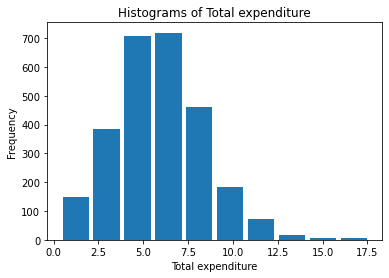

In [15]:
#reference: https://realpython.com/python-histograms/ 
n, bins, patches = plt.hist(x=clean_data['Total expenditure'], rwidth=0.85)
plt.xlabel('Total expenditure')
plt.ylabel('Frequency')
plt.title('Histograms of Total expenditure')
plt.show()
#skew

<AxesSubplot:>

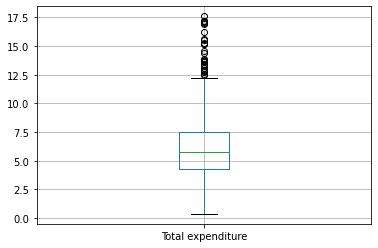

In [16]:
clean_data.boxplot(column = ['Total expenditure'])

In [17]:
Q1 = clean_data['Total expenditure'].quantile(q=0.25)
Q3 = clean_data['Total expenditure'].quantile(q=0.75)
mask1 = (clean_data['Total expenditure'] < Q3 + 1.5 * (Q3-Q1)) & (clean_data['Total expenditure'] > Q1 - 1.5 * (Q3-Q1))
deduct_outlier = clean_data[mask1]

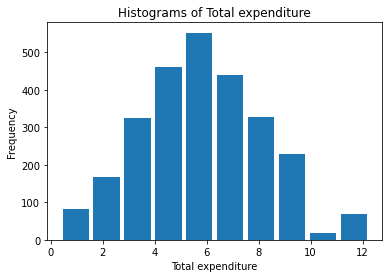

In [18]:
#reference: https://realpython.com/python-histograms/ 
n, bins, patches = plt.hist(x=deduct_outlier['Total expenditure'], rwidth=0.85)
plt.xlabel('Total expenditure')
plt.ylabel('Frequency')
plt.title('Histograms of Total expenditure')
plt.show()


Text(0, 0.5, 'Life Expectancy')

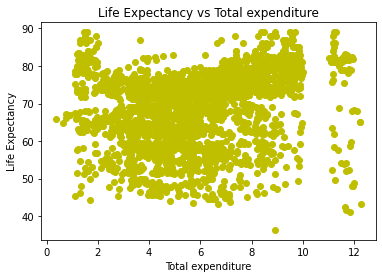

In [19]:
plt.scatter(deduct_outlier['Total expenditure'],deduct_outlier['Life expectancy '], color ='y'  )

plt.title('Life Expectancy vs Total expenditure')
plt.xlabel('Total expenditure')
plt.ylabel("Life Expectancy")
#mild correlation

2672 178


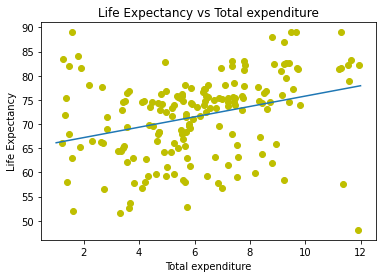

In [20]:
mask2 = deduct_outlier['Year']==2014
plt.scatter(deduct_outlier[mask2]['Total expenditure'],deduct_outlier[mask2]['Life expectancy '], color ='y' )
model = np.poly1d(np.polyfit(deduct_outlier[mask2]['Total expenditure'], deduct_outlier[mask2]['Life expectancy '],1))
polyline = np.linspace(1,12)
plt.plot(polyline, model(polyline))
plt.title('Life Expectancy vs Total expenditure')
plt.xlabel('Total expenditure')
plt.ylabel("Life Expectancy")
print(len(deduct_outlier),len(deduct_outlier[mask2]))
#using year 2014 as mask

2672 15


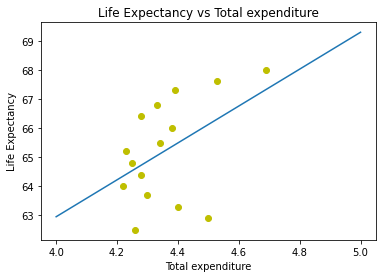

In [21]:
mask3 = deduct_outlier['Country']=='India'
plt.scatter(deduct_outlier[mask3]['Total expenditure'],deduct_outlier[mask3]['Life expectancy '], color ='y' )
model = np.poly1d(np.polyfit(deduct_outlier[mask3]['Total expenditure'], deduct_outlier[mask3]['Life expectancy '],1))
polyline = np.linspace(4,5)
plt.plot(polyline, model(polyline))
plt.title('Life Expectancy vs Total expenditure')
plt.xlabel('Total expenditure')
plt.ylabel("Life Expectancy")
print(len(deduct_outlier),len(deduct_outlier[mask3]))
#using China as mask

In [22]:
data['percentage expenditure'].isna().value_counts(normalize=True)

False    1.0
Name: percentage expenditure, dtype: float64

In [23]:
print('sample size', len(data))
print('Descriptive Statistic: percentage expenditure')

print('min', np.min(data['percentage expenditure']))
print('1st quantile',data['percentage expenditure'].quantile(q=0.25))
print('mean', np.mean(data['percentage expenditure']))
print('3rd quantile',data['percentage expenditure'].quantile(q=0.75))
print('Max', np.max(data['percentage expenditure']))

print('std', np.std(data['percentage expenditure']))
print('var', np.var(data['percentage expenditure']))

sample size 2938
Descriptive Statistic: percentage expenditure
min 0.0
1st quantile 4.68534258525
mean 738.2512954533823
3rd quantile 441.53414435
Max 19479.91161
std 1987.5765183221447
var 3950460.4161855783


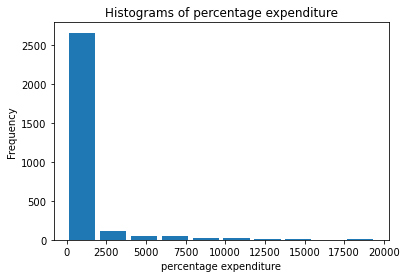

In [24]:
#reference: https://realpython.com/python-histograms/ 
n, bins, patches = plt.hist(x=data['percentage expenditure'], rwidth=0.85)
plt.xlabel('percentage expenditure')
plt.ylabel('Frequency')
plt.title('Histograms of percentage expenditure')
plt.show()

In [25]:
Q1 = data['percentage expenditure'].quantile(q=0.25)
Q3 = data['percentage expenditure'].quantile(q=0.75)
mask1 = (data['percentage expenditure'] < Q3 + 1.5 * (Q3-Q1)) & (data['percentage expenditure'] > Q1 - 1.5 * (Q3-Q1))
deduct_outlier2 = data[mask1]

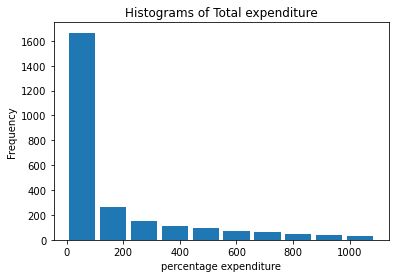

In [26]:
#reference: https://realpython.com/python-histograms/ 
n, bins, patches = plt.hist(x=deduct_outlier2['percentage expenditure'], rwidth=0.85)
plt.xlabel('percentage expenditure')
plt.ylabel('Frequency')
plt.title('Histograms of Total expenditure')
plt.show()
#Even we remove the outliers, percentage expenditure data distribution is too skew to use

LinAlgError: SVD did not converge in Linear Least Squares

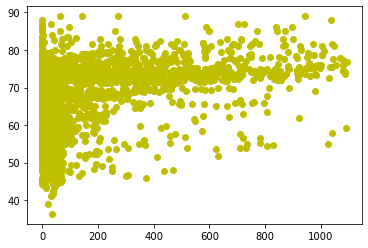

In [27]:
#meaning...?
plt.scatter(deduct_outlier2['percentage expenditure'],deduct_outlier2['Life expectancy '], color ='y'  )
model = np.poly1d(np.polyfit(deduct_outlier2['percentage expenditure'], deduct_outlier2['Life expectancy '],2))
polyline = np.linspace(0,1200)
plt.plot(polyline, model(polyline))
plt.title('Life Expectancy vs percentage expenditure')
plt.xlabel('percentage expenditure')
plt.ylabel("Life Expectancy")

In [ ]:
mask2 = deduct_outlier2['Year']==2014
plt.scatter(deduct_outlier2[mask2]['percentage expenditure'],deduct_outlier2[mask2]['Life expectancy '], color ='y' )
model = np.poly1d(np.polyfit(deduct_outlier2[mask2]['percentage expenditure'], deduct_outlier2[mask2]['Life expectancy '],2))
polyline = np.linspace(0,1200)
plt.plot(polyline, model(polyline))
plt.title('Life Expectancy vs percentage expenditure')
plt.xlabel('percentage expenditure')
plt.ylabel("Life Expectancy")
print(len(deduct_outlier2),len(deduct_outlier2[mask2]))
#using year 2014 as mask

In [ ]:
mask3 = deduct_outlier2['Country']=='India'
plt.scatter(deduct_outlier2[mask3]['percentage expenditure'],deduct_outlier2[mask3]['Life expectancy '], color ='y' )
model = np.poly1d(np.polyfit(deduct_outlier2[mask3]['percentage expenditure'], deduct_outlier2[mask3]['Life expectancy '],1))
polyline = np.linspace(0,100)
plt.plot(polyline, model(polyline))
plt.title('Life Expectancy vs percentage expenditure')
plt.xlabel('percentage expenditure')
plt.ylabel("Life Expectancy")
print(len(deduct_outlier2),len(deduct_outlier2[mask2]))
#using India as mask

In [ ]:
clean_data2 = data[data['New GDP'].isna() != True]

In [ ]:
clean_data2['GDP percentage'] = clean_data2['New GDP'] * clean_data2['percentage expenditure']

In [ ]:
plt.scatter(clean_data2['GDP percentage'],clean_data2['Life expectancy '], color ='y'  )
#model = np.poly1d(np.polyfit(clean_data2['GDP percentage'], clean_data2['Life expectancy '],2))
#polyline = np.linspace(0,0.5e9)
#plt.plot(polyline, model(polyline))
plt.title('Life Expectancy vs GDP percentage')
plt.xlabel('GDP percentage')
plt.ylabel("Life Expectancy")

In [ ]:
mask2 = clean_data2['Year']==2014
plt.scatter(clean_data2[mask2]['GDP percentage'],clean_data2[mask2]['Life expectancy '], color ='y' )
#model = np.poly1d(np.polyfit(clean_data2[mask2]['GDP percentage'], clean_data2[mask2]['Life expectancy '],2))
#polyline = np.linspace(0,0.75e9)
#plt.plot(polyline, model(polyline))
plt.title('Life Expectancy vs GDP percentage')
plt.xlabel('GDP percentage')
plt.ylabel("Life Expectancy")
print(len(clean_data2),len(clean_data2[mask2]))
#using year 2013 as mask

In [ ]:
mask3 = clean_data2['Country']=='India'
plt.scatter(clean_data2[mask3]['GDP percentage'],clean_data2[mask3]['Life expectancy '], color ='y' )
model = np.poly1d(np.polyfit(clean_data2[mask3]['GDP percentage'], clean_data2[mask3]['Life expectancy '],2))
polyline = np.linspace(0,140000)
plt.plot(polyline, model(polyline))
plt.title('Life Expectancy vs GDP percentage')
plt.xlabel('GDP percentage')
plt.ylabel("Life Expectancy")
print(len(clean_data2),len(clean_data2[mask2]))
#using India as mask

In [28]:
clean_data2 = data[data['New BMI'].isna() != True]
clean_data2['New BMI'] = clean_data2['New BMI'].astype(float, errors = 'raise')

In [29]:
print('sample size', len(clean_data2))
print('Descriptive Statistic: New BMI')

print('min', np.min(clean_data2['New BMI']))
print('1st quantile',clean_data2['New BMI'].quantile(q=0.25))
print('mean', np.mean(clean_data2['New BMI']))
print('3rd quantile',clean_data2['New BMI'].quantile(q=0.75))
print('Max', np.max(clean_data2['New BMI']))

print('std', np.std(clean_data2['New BMI']))
print('var', np.var(clean_data2['New BMI']))


sample size 2938
Descriptive Statistic: New BMI
min 0.0
1st quantile 23.0
mean 24.329373723621476
3rd quantile 26.4
Max 32.7
std 4.665730219135853
var 21.7690384777575


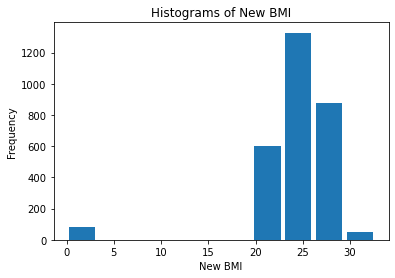

In [30]:
n, bins, patches = plt.hist(x=clean_data2['New BMI'], rwidth=0.85)
plt.xlabel('New BMI')
plt.ylabel('Frequency')
plt.title('Histograms of New BMI')
plt.show()
#skew

<AxesSubplot:>

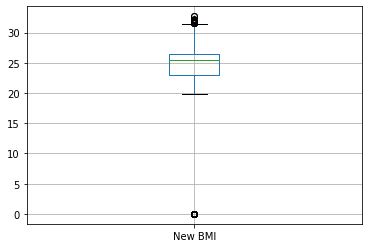

In [31]:
clean_data2.boxplot(column = ['New BMI'])

In [32]:
Q1 = clean_data2['New BMI'].quantile(q=0.25)
Q3 = clean_data2['New BMI'].quantile(q=0.75)
mask1 = (clean_data2['New BMI'] < Q3 + 1.5 * (Q3-Q1)) & (clean_data2['New BMI'] > Q1 - 1.5 * (Q3-Q1))
deduct_outlier3 = clean_data2[mask1]

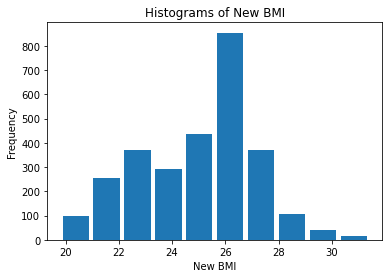

In [33]:
n, bins, patches = plt.hist(x=deduct_outlier3['New BMI'], rwidth=0.85)
plt.xlabel('New BMI')
plt.ylabel('Frequency')
plt.title('Histograms of New BMI')
plt.show()

Text(0, 0.5, 'Life Expectancy')

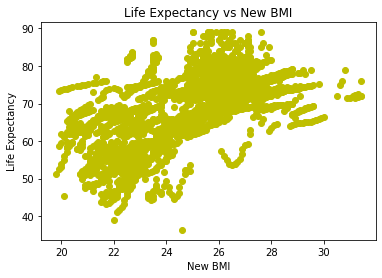

In [43]:
plt.scatter(deduct_outlier3['New BMI'],deduct_outlier3['Life expectancy '], color ='y'  )

#model = np.poly1d(np.polyfit(deduct_outlier3['New BMI'], deduct_outlier3['Life expectancy '],2))
#polyline = np.linspace(18,32.5)
#plt.plot(polyline, model(polyline))
plt.title('Life Expectancy vs New BMI')
plt.xlabel('New BMI')
plt.ylabel("Life Expectancy")

Text(0, 0.5, 'Life Expectancy')

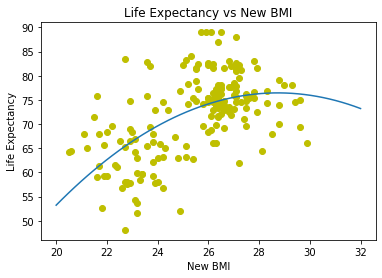

In [44]:
mask2 = deduct_outlier3['Year']==2014
plt.scatter(deduct_outlier3[mask2]['New BMI'],deduct_outlier3[mask2]['Life expectancy '], color ='y'  )

model = np.poly1d(np.polyfit(deduct_outlier3[mask2]['New BMI'], deduct_outlier3[mask2]['Life expectancy '],2))
polyline = np.linspace(20,32)
plt.plot(polyline, model(polyline))
plt.title('Life Expectancy vs New BMI')
plt.xlabel('New BMI')
plt.ylabel("Life Expectancy")

Text(0, 0.5, 'Life Expectancy')

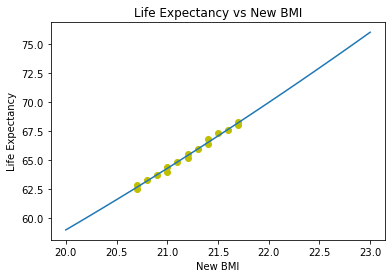

In [45]:
mask3 = deduct_outlier3['Country']=='India'
plt.scatter(deduct_outlier3[mask3]['New BMI'],deduct_outlier3[mask3]['Life expectancy '], color ='y'  )

model = np.poly1d(np.polyfit(deduct_outlier3[mask3]['New BMI'], deduct_outlier3[mask3]['Life expectancy '],2))
polyline = np.linspace(20,23)
plt.plot(polyline, model(polyline))
plt.title('Life Expectancy vs New BMI')
plt.xlabel('New BMI')
plt.ylabel("Life Expectancy")